In [1]:
!pip install pennylane

2025-10-24 04:31:51.668983: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761280311.694593      91 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761280311.702133      91 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Train1 - ['sad.jpg', 'saadgirl.jpg', 'happy.jpg', 'data', 'very-happy-people.jpg']
Train2 - ['sad.jpg', 'saadgirl.jpg', 'happy.jpg', 'data', 'very-happy-people.jpg']
['sad.jpg', 'saadgirl.jpg', 'happy.jpg', 'data', 'very-happy-people.jpg']
Train Classes - ['sad', 'happy']
Validation Classes - ['sad', 'happy']


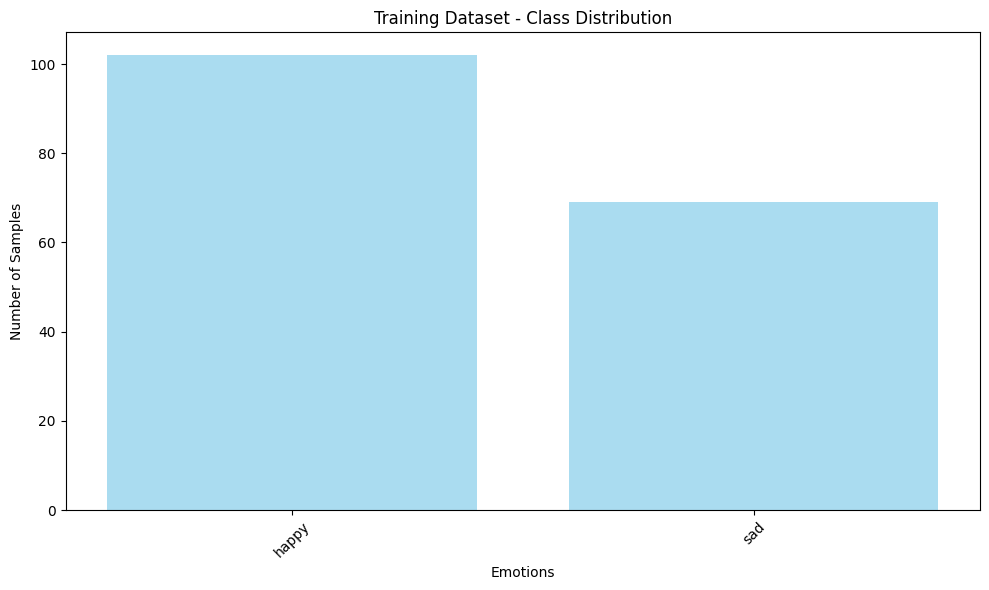

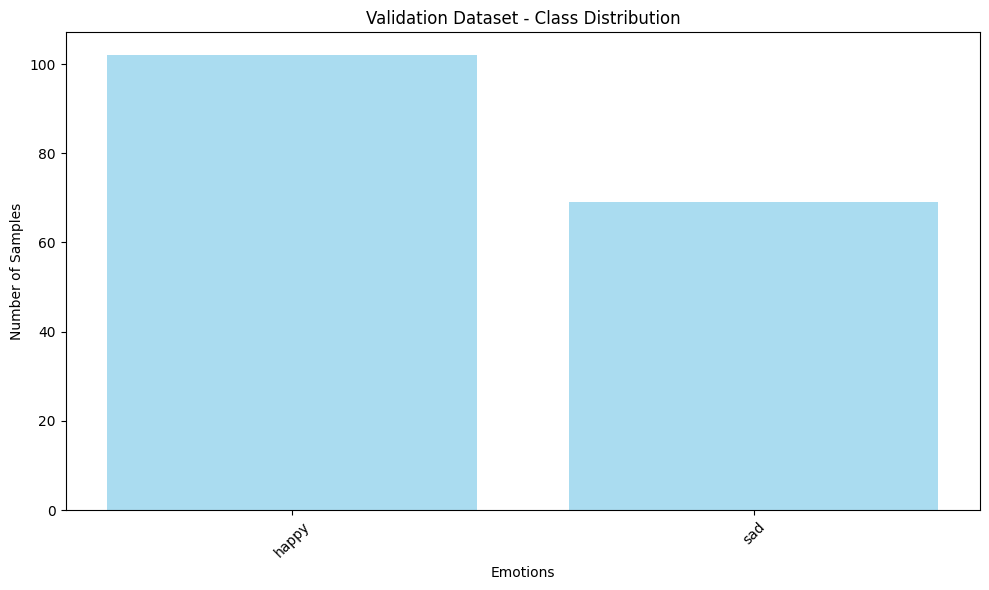

Train images shape: (171, 48, 48, 1)
Test images shape: (171, 48, 48, 1)
Train labels shape: (171, 2)
Test labels shape: (171, 2)


In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix, classification_report
import itertools
     

# Constants
IMG_SIZE = 48
DATA_DIR = '/kaggle/input/happy-and-sad-image'
     

import os
import torch
import torchvision
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torchvision.transforms as tt
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
%matplotlib inline
train1 = os.listdir(DATA_DIR)
train2 = os.listdir(DATA_DIR)
print(f'Train1 - {train1}')
print(f'Train2 - {train2}')
data_dir = DATA_DIR
print(os.listdir(data_dir))
classes_train = os.listdir(data_dir + f"/{train1[3]}")
classes_valid = os.listdir(data_dir + f"/{train2[3]}")
print(f'Train Classes - {classes_train}')
print(f'Validation Classes - {classes_valid}')
     
import torchvision.transforms as transforms

# Define transforms
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor()
])
     

import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder

# Load the datasets
train_dataset = ImageFolder(root=os.path.join(DATA_DIR, train1[3]), transform=transform)
val_dataset = ImageFolder(root=os.path.join(DATA_DIR, train2[3]), transform=transform)
     
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder

# Load the datasets
train_dataset = ImageFolder(root=os.path.join(DATA_DIR, train1[3]), transform=transform)
val_dataset = ImageFolder(root=os.path.join(DATA_DIR, train2[3]), transform=transform)
     

def plot_class_distribution(dataset, title):
    class_counts = {}
    for _, label in dataset:
        class_name = emotion_labels[label]
        class_counts[class_name] = class_counts.get(class_name, 0) + 1

    plt.figure(figsize=(10, 6))
    plt.bar(class_counts.keys(), class_counts.values(), color='skyblue', alpha=0.7)
    plt.title(f'{title} - Class Distribution')
    plt.xlabel('Emotions')
    plt.ylabel('Number of Samples')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    return class_counts

# Define emotion_labels based on the dataset classes
emotion_labels = {i: class_name for i, class_name in enumerate(train_dataset.classes)}

train_counts = plot_class_distribution(train_dataset, 'Training Dataset')
val_counts = plot_class_distribution(val_dataset, 'Validation Dataset')

# ------------------------- Convert Dataset to NumPy Arrays -------------------------

def dataset_to_numpy(dataset, n_samples):
    images = []
    labels = []
    # Use the actual number of samples available in the dataset
    num_samples_to_extract = min(n_samples, len(dataset))
    for i in range(num_samples_to_extract):
        img_tensor, label = dataset[i]
        img_array = img_tensor.numpy().transpose(1, 2, 0)  # (1, 48, 48) → (48, 48, 1)
        images.append(img_array)
        labels.append(label)
    return np.array(images), np.array(labels)

# Define number of samples to extract (these values will be capped by the actual dataset size)
n_train = 5000
n_test = 3000

train_images, train_labels = dataset_to_numpy(train_dataset, n_train)
test_images, test_labels = dataset_to_numpy(val_dataset, n_test)

# Clip values (just in case)
train_images = np.clip(train_images, 0.0, 1.0)
test_images = np.clip(test_images, 0.0, 1.0)

# One-hot encode labels
train_labels_categorical = to_categorical(train_labels, num_classes=len(emotion_labels))
test_labels_categorical = to_categorical(test_labels, num_classes=len(emotion_labels))

# ------------------------- Final Shape Checks -------------------------

print(f"Train images shape: {train_images.shape}")
print(f"Test images shape: {test_images.shape}")
print(f"Train labels shape: {train_labels_categorical.shape}")
print(f"Test labels shape: {test_labels_categorical.shape}")


=== Running for 10 Qubits ===

Quantum Circuit for 10 Qubits:


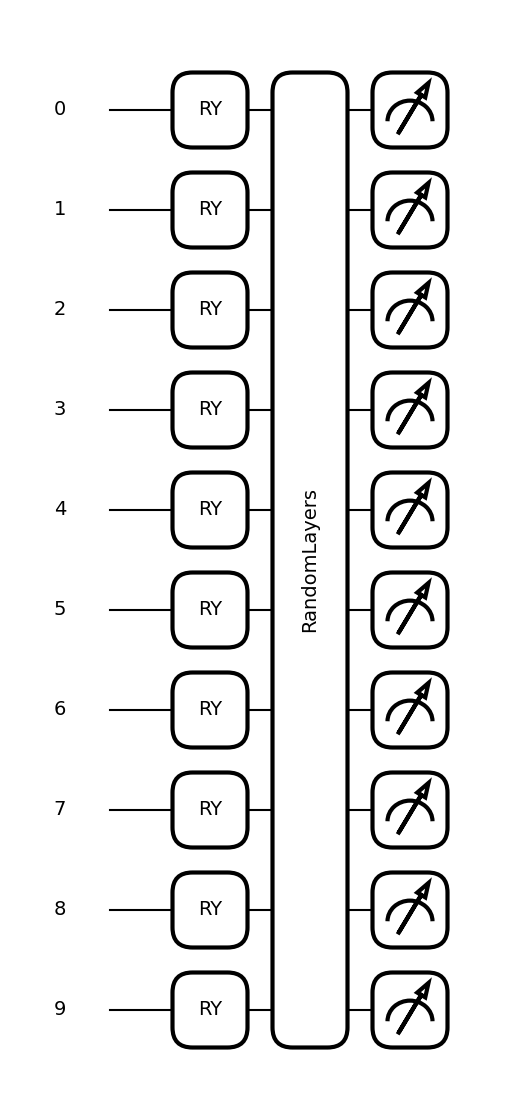

Quantum pre-processing (train)...
Quantum pre-processing (test)...
Epoch 1/9


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-10-24 05:08:50.542839: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


22/22 - 2s - 85ms/step - accuracy: 0.6316 - loss: 1.1814 - val_accuracy: 0.7485 - val_loss: 0.6069
Epoch 2/9
22/22 - 0s - 11ms/step - accuracy: 0.7310 - loss: 0.7794 - val_accuracy: 0.8363 - val_loss: 0.3712
Epoch 3/9
22/22 - 0s - 10ms/step - accuracy: 0.7076 - loss: 0.5878 - val_accuracy: 0.8655 - val_loss: 0.2679
Epoch 4/9
22/22 - 0s - 10ms/step - accuracy: 0.8655 - loss: 0.3281 - val_accuracy: 0.9474 - val_loss: 0.1908
Epoch 5/9
22/22 - 0s - 10ms/step - accuracy: 0.8947 - loss: 0.2693 - val_accuracy: 0.9708 - val_loss: 0.1551
Epoch 6/9
22/22 - 0s - 10ms/step - accuracy: 0.9357 - loss: 0.2337 - val_accuracy: 0.9766 - val_loss: 0.1440
Epoch 7/9
22/22 - 0s - 10ms/step - accuracy: 0.9064 - loss: 0.2302 - val_accuracy: 0.9708 - val_loss: 0.1529
Epoch 8/9
22/22 - 0s - 10ms/step - accuracy: 0.9064 - loss: 0.2248 - val_accuracy: 0.9942 - val_loss: 0.0964
Epoch 9/9
22/22 - 0s - 10ms/step - accuracy: 0.9240 - loss: 0.1796 - val_accuracy: 0.9766 - val_loss: 0.0939
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1

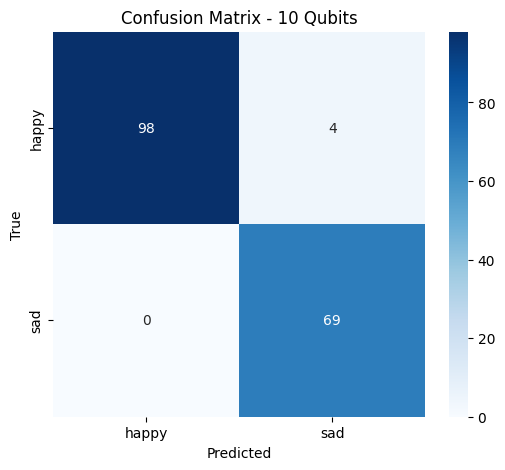

Test Accuracy: 0.9766


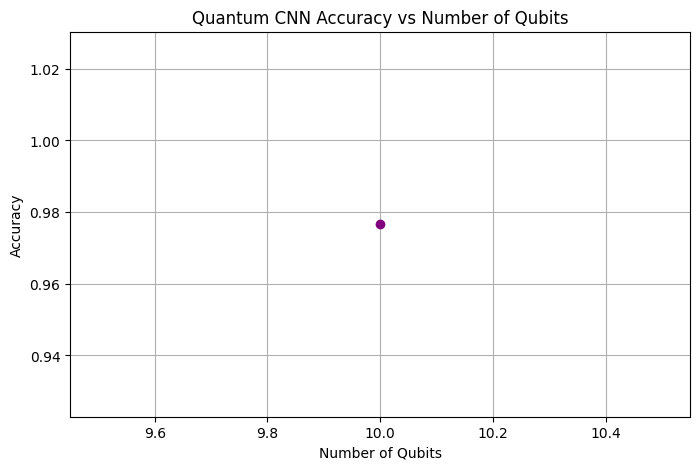


=== Final Accuracy Comparison ===
10 Qubits: 0.9766


In [3]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.templates import RandomLayers
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Fix seeds
np.random.seed(0)
tf.random.set_seed(0)

# Define qubit patch sizes
qubit_patch_shapes = {
    # 4: (2, 2),
    # 6: (3, 2),
     # 8: (4, 2),
    10: (5, 2),
    # 12: (4, 3),
}

# Function to create quantum circuit
def create_circuit(n_qubits, n_layers=1):
    dev = qml.device("default.qubit", wires=n_qubits)
    rand_params = np.random.uniform(high=2*np.pi, size=(n_layers, n_qubits))

    @qml.qnode(dev)
    def circuit(phi):
        for j in range(n_qubits):
            qml.RY(np.pi * phi[j], wires=j)
        RandomLayers(rand_params, wires=range(n_qubits))
        return [qml.expval(qml.PauliZ(j)) for j in range(n_qubits)]

    return circuit

# Quantum convolution function
def quanv(image, circuit, patch_h, patch_w):
    out_h = (image.shape[0] - patch_h) // 2 + 1
    out_w = (image.shape[1] - patch_w) // 2 + 1
    n_qubits = patch_h * patch_w
    out = np.zeros((out_h, out_w, n_qubits))
    for j in range(0, image.shape[0] - patch_h + 1, 2):
        for k in range(0, image.shape[1] - patch_w + 1, 2):
            patch = image[j:j+patch_h, k:k+patch_w, 0].flatten()
            q_results = circuit(patch)
            out[j//2, k//2, :] = q_results
    return out

# Classical model
def build_model(input_shape):
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=input_shape),
        keras.layers.Dense(64, activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(2, activation="softmax")
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Run experiment for different qubits
results = {}
for n_qubits in [10]:
    print(f"\n=== Running for {n_qubits} Qubits ===")
    patch_h, patch_w = qubit_patch_shapes[n_qubits]
    circuit = create_circuit(n_qubits)

    # Show quantum circuit diagram
    print(f"\nQuantum Circuit for {n_qubits} Qubits:")
    fig, ax = qml.draw_mpl(circuit)(np.random.rand(n_qubits))
    plt.show()

    # Quantum preprocess images
    print("Quantum pre-processing (train)...")
    q_train_images = np.array([quanv(img, circuit, patch_h, patch_w) for img in train_images])
    print("Quantum pre-processing (test)...")
    q_test_images = np.array([quanv(img, circuit, patch_h, patch_w) for img in test_images])

    # Build & train model
    model = build_model(q_train_images.shape[1:])
    model.fit(q_train_images, train_labels, validation_data=(q_test_images, test_labels),
              epochs=9, batch_size=8, verbose=2)

    # Predictions
    y_pred = np.argmax(model.predict(q_test_images), axis=1)

    # Classification report
    print(f"\nClassification Report ({n_qubits} Qubits):")
    print(classification_report(test_labels, y_pred, target_names=emotion_labels.values()))

    # Confusion matrix
    cm = confusion_matrix(test_labels, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=emotion_labels.values(),
                yticklabels=emotion_labels.values())
    plt.title(f"Confusion Matrix - {n_qubits} Qubits")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    # Evaluate accuracy
    acc = model.evaluate(q_test_images, test_labels, verbose=0)[1]
    print(f"Test Accuracy: {acc:.4f}")
    results[n_qubits] = acc

# Compare accuracies
plt.figure(figsize=(8, 5))
plt.plot(list(results.keys()), list(results.values()), marker='o', color='purple')
plt.title("Quantum CNN Accuracy vs Number of Qubits")
plt.xlabel("Number of Qubits")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

print("\n=== Final Accuracy Comparison ===")
for q, a in results.items():
    print(f"{q} Qubits: {a:.4f}")


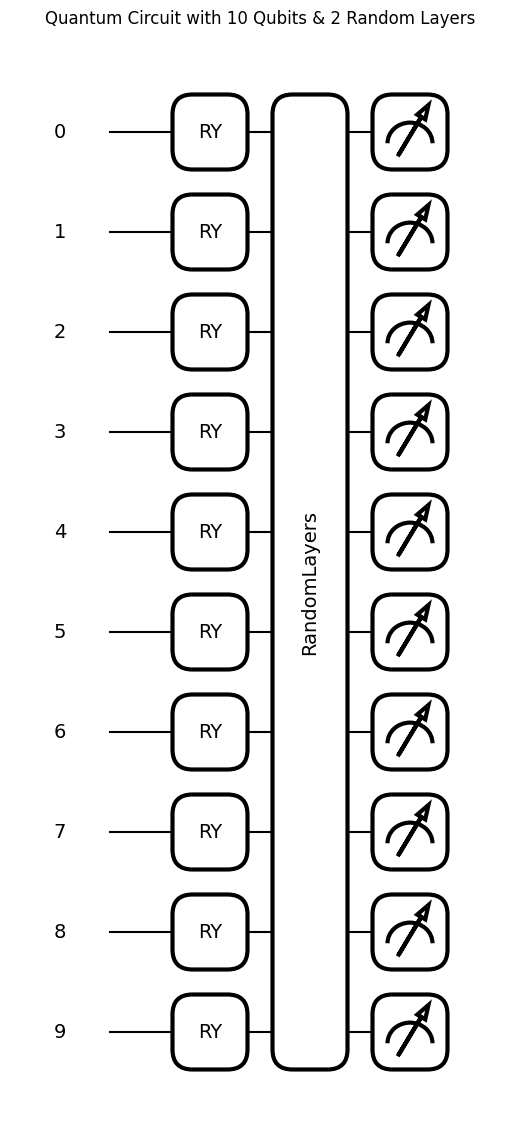

In [4]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.templates import RandomLayers
import matplotlib.pyplot as plt

# Function to create and display detailed quantum circuits
def show_detailed_circuit(n_qubits=4, n_layers=2):
    dev = qml.device("default.qubit", wires=n_qubits)

    # Random parameters for encoding & random layers
    rand_params = np.random.uniform(0, 2*np.pi, size=(n_layers, n_qubits))
    sample_inputs = np.random.rand(n_qubits)  # Sample classical input for encoding

    @qml.qnode(dev)
    def circuit(phi):
        # Encoding using RY rotations
        for j in range(n_qubits):
            qml.RY(np.pi * phi[j], wires=j)

        # Apply random entangling layers
        RandomLayers(rand_params, wires=range(n_qubits))

        # Measurement
        return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]

    # Draw circuit
    fig, ax = qml.draw_mpl(circuit)(sample_inputs)
    plt.title(f"Quantum Circuit with {n_qubits} Qubits & {n_layers} Random Layers")
    plt.show()

# Show circuits for 4, 6, 8, 10, 12 qubits
for q in [10]:
    show_detailed_circuit(n_qubits=q, n_layers=2)

In [5]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

def save_explicit_randomlayer_circuit(n_qubits=4, n_layers=2, save_dir="./circuits"):
    import os
    os.makedirs(save_dir, exist_ok=True)  # Ensure save directory exists

    dev = qml.device("default.qubit", wires=n_qubits)

    # Random rotation parameters (RX, RY, RZ per qubit per layer)
    rotation_params = np.random.uniform(0, 2*np.pi, size=(n_layers, n_qubits, 3))

    # Entangling pairs (nearest-neighbor entanglement)
    entangling_pairs = [
        [(i, (i+1) % n_qubits) for i in range(n_qubits - 1)]
        for _ in range(n_layers)
    ]

    sample_inputs = np.random.rand(n_qubits)  # Random classical inputs

    @qml.qnode(dev)
    def circuit(phi):
        # Encoding layer: RY rotations
        for j in range(n_qubits):
            qml.RY(np.pi * phi[j], wires=j)

        # Explicit random layers: rotations + CNOT entanglements
        for layer in range(n_layers):
            # Single-qubit random rotations
            for q in range(n_qubits):
                qml.RX(rotation_params[layer, q, 0], wires=q)
                qml.RY(rotation_params[layer, q, 1], wires=q)
                qml.RZ(rotation_params[layer, q, 2], wires=q)

            # CNOT entangling gates
            for (control, target) in entangling_pairs[layer]:
                qml.CNOT(wires=[control, target])

        # Measurements
        return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]

    # Draw and save the circuit
    fig, ax = qml.draw_mpl(circuit)(sample_inputs)
    plt.title(f"Quantum Circuit ({n_qubits} Qubits, {n_layers} Layers)", fontsize=14)
    save_path = f"{save_dir}/circuit_{n_qubits}_qubits.pdf"
    fig.savefig(save_path, format="pdf", bbox_inches="tight")
    plt.close(fig)
    print(f"✅ Saved: {save_path}")

# Generate and save circuits for all qubit configurations
for q in [10]:
    save_explicit_randomlayer_circuit(n_qubits=q, n_layers=2)


✅ Saved: ./circuits/circuit_10_qubits.pdf
